# Model Evaluation

## Standard Flares

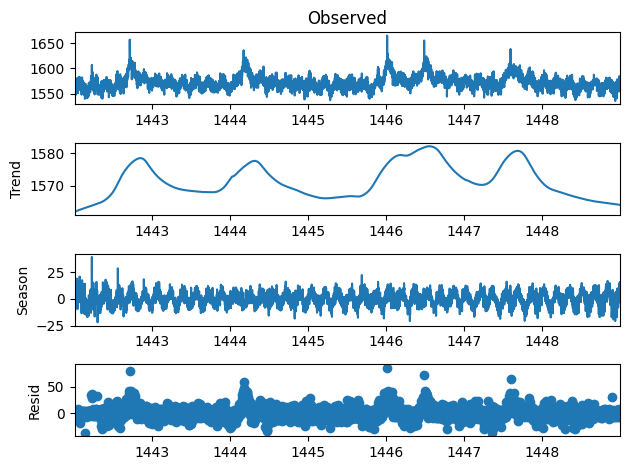

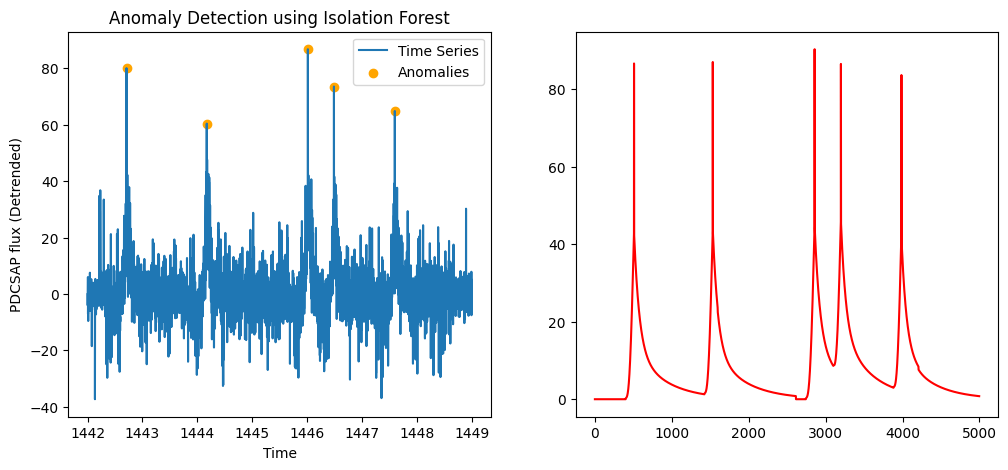

In [36]:
## Load Data
import pandas as pd
inj_std = pd.read_csv("../0.Data/031381302_inj_std.csv", index_col = 'time')
data = inj_std



## STL Decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()
data = decomposition.resid.to_frame()

decomposition.plot()



## Run Model
from sklearn.ensemble import IsolationForest

# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
# model.fit(data[['resid']].values)
model.fit(data[[data.columns[0]]].values)

# Predict anomalies
anomalies = model.predict(data[[data.columns[0]]].values)
scores = model.decision_function(data[[data.columns[0]]].values)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
import matplotlib.pyplot as plt
import numpy as np

# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
data_anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['resid'], label='Time Series')#, color='steelblue')
ax[0].scatter(data_anomalies.index, data_anomalies['resid'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

### Results

In [37]:
# np.where(np.where(anomalies == -1, 1, 0))

# np.where(np.array(data["anomaly"]))

# data['anomaly'].values

In [40]:
flareSims["flare_std_times"]

array([[ 401, 1596],
       [1425, 2613],
       [2744, 3990],
       [3099, 4207],
       [3884, 4997]], dtype=int64)

In [38]:
## Results
import detectFlare

# prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_std_times"], y_pred=np.where(anomalies == -1, 1, 0))
prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_std_times"], y_pred=data["anomaly"].values)
                                               #np.array(data["anomaly"]))
print("Precision =", prec)
print("Recall    =", rec)
print("F1        =", f1)

Precision = 1.0
Recall    = 1.0
F1        = 1.0


## High-Emission Flares

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


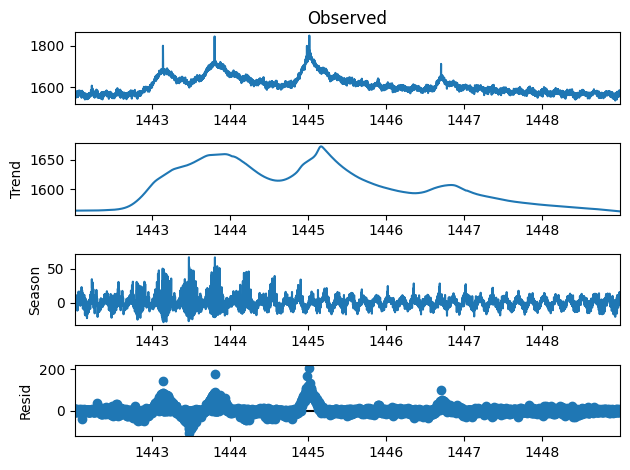

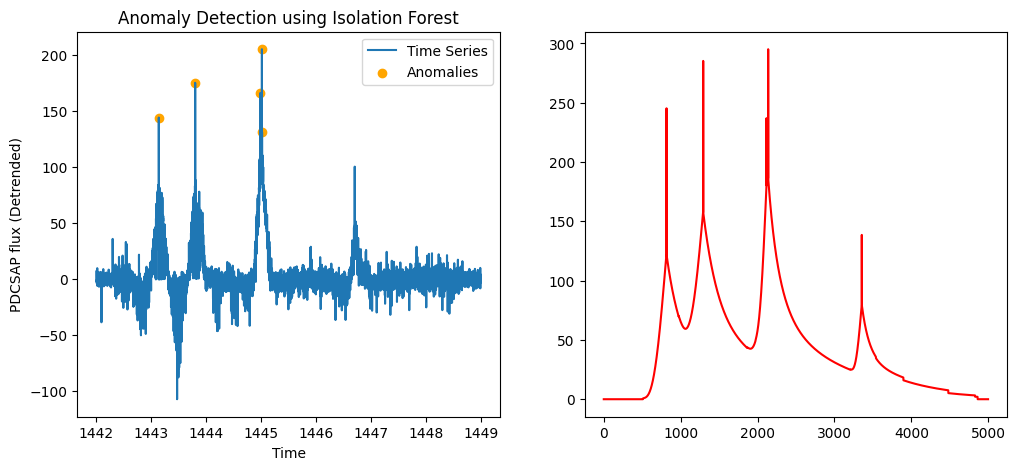

In [18]:
## Load Data
inj_high = pd.read_csv("../0.Data/031381302_inj_high.csv", index_col = 'time')
data = inj_high


## STL Decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()
data = decomposition.resid.to_frame()

decomposition.plot()



## Run Model
from sklearn.ensemble import IsolationForest

# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
model.fit(data)

# Predict anomalies
anomalies = model.predict(data)
scores = model.decision_function(data)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
import matplotlib.pyplot as plt
import numpy as np

# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
data_anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['resid'], label='Time Series')#, color='steelblue')
ax[0].scatter(data_anomalies.index, data_anomalies['resid'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_high"], 'r-')

plt.show()

### Results

In [19]:
flareSims["flare_high_times"]
# anomalies

array([[ 509, 3895],
       [ 975, 4479],
       [1974, 3538],
       [1866, 4860],
       [3208, 4827]], dtype=int64)

In [30]:
np.where(np.where(anomalies == -1, 1, 0))

np.where(np.array(data["anomaly"]))

np.sum(np.where(anomalies == -1, 1, 0) != np.array(data["anomaly"]))

0

In [32]:
## Results
# prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_high_times"], y_pred=np.where(anomalies == -1, 1, 0))
prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_high_times"], y_pred=np.array(data["anomaly"]))
print("Precision =", prec)
print("Recall    =", rec)
print("F1        =", f1)

Precision = 1.0
Recall    = 0.8
F1        = 0.888888888888889


## Low-Emission Flares

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


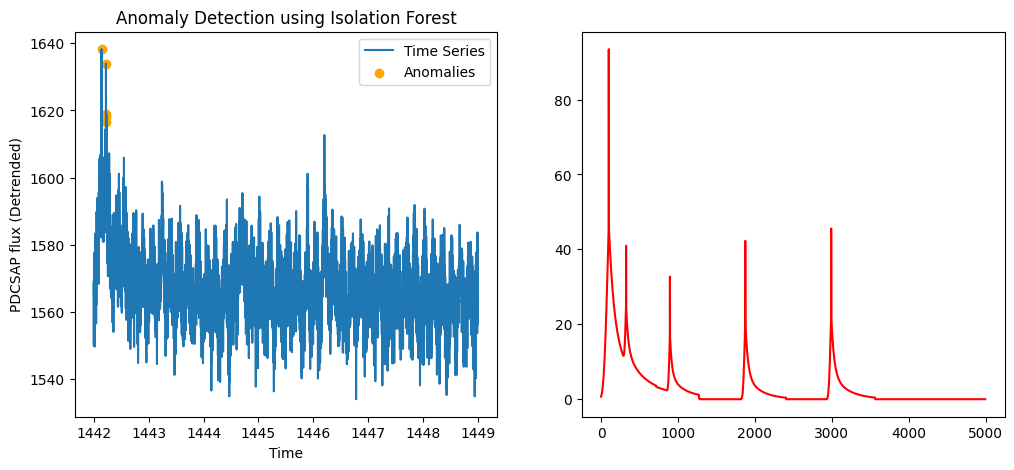

In [33]:
## Load Data
inj_low = pd.read_csv("../0.Data/031381302_inj_low.csv", index_col = 'time')
data = inj_low


## STL Decomposition
# from statsmodels.tsa.seasonal import STL
# stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
# decomposition = stl.fit()
# data = decomposition.resid.to_frame()

# decomposition.plot()



## Run Model
from sklearn.ensemble import IsolationForest

# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
model.fit(data)

# Predict anomalies
anomalies = model.predict(data)
scores = model.decision_function(data)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
import matplotlib.pyplot as plt
import numpy as np

# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
data_anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# ax[0].plot(data['resid'], label='Time Series')#, color='steelblue')
# ax[0].scatter(anomalies.index, anomalies['resid'], label='Anomalies', color='orange')
ax[0].plot(data['pdcsap_flux'], label='Time Series')
ax[0].scatter(data_anomalies.index, data_anomalies['pdcsap_flux'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_low"], 'r-')

plt.show()

### Results

In [ ]:
flareSims["flare_low_times"]
# anomalies

array([[   0, 1273],
       [ 287,  716],
       [ 858, 1280],
       [1823, 2406],
       [2936, 3564]], dtype=int64)

In [36]:
## Results
# prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_low_times"], y_pred=np.where(anomalies == -1, 1, 0))
prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_low_times"], y_pred=np.array(data["anomaly"]))
print("Precision =", prec)
print("Recall    =", rec)
print("F1        =", f1)

Precision = 1.0
Recall    = 0.2
F1        = 0.33333333333333337


## Model Function

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


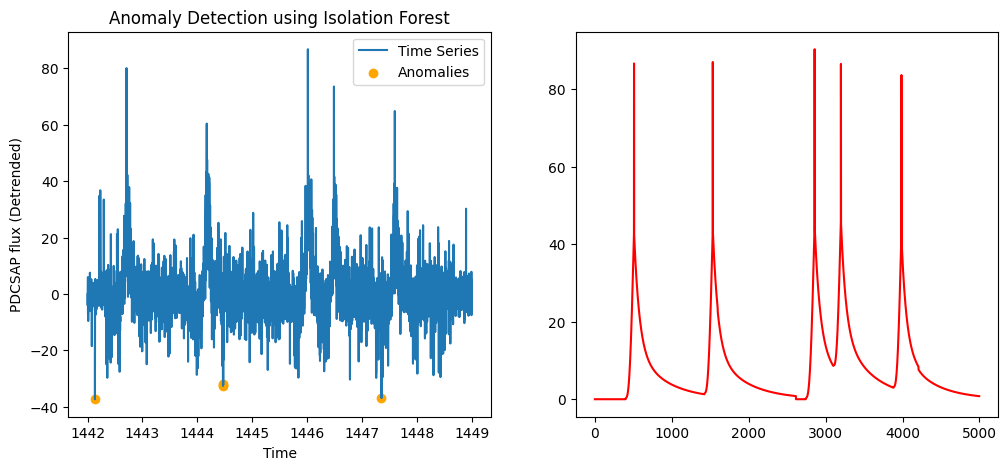

In [3]:
## Load Data
inj_std = pd.read_csv("../0.Data/031381302_inj_std.csv", index_col = 'time')
data = inj_std



## Run Model
from STL_IF import STLIF

data = STLIF(data, contamination=0.001)



## Plot - Highlight anomalies
# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
data_anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['resid'], label='Time Series')#, color='steelblue')
ax[0].scatter(data_anomalies.index, data_anomalies['resid'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

In [4]:
## Results
prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_std_times"], y_pred=np.array(data["anomaly"]))
print("Precision =", prec)
print("Recall    =", rec)
print("F1        =", f1)

Precision = 0.75
Recall    = 0.6
F1        = 0.6666666666666665


## Sigma-clipping

In [78]:
## Load Data
inj_std = pd.read_csv("../0.Data/031381302_inj_std.csv", index_col = 'time')
data = inj_std



## Run Model
from sigma_clip import sigma_clip

data = sigma_clip(data, sigma=3.0, consecutive_pts=1)
# data = data.ravel()

In [79]:
data

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
## Plot - Highlight anomalies
# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
data_anomalies = data[data == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['resid'], label='Time Series')#, color='steelblue')
ax[0].scatter(data_anomalies.index, data_anomalies['resid'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

In [ ]:
## Results
prec, rec, f1 = detectFlare.event_level_scores(real_flares=flareSims["flare_std_times"], y_pred=np.array(data["anomaly"]))
print("Precision =", prec)
print("Recall    =", rec)
print("F1        =", f1)